In [2]:
import os, sys
sys.path.append(os.path.abspath('..'))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import Input
from main import *

X_train, X_test, y_train, y_test = load_data()
X_train, X_test = preprocess_for_cnn(X_train, X_test)

In [3]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax") # 10 classes
])

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history, cnn_time = train_cnn_with_timing(model, X_train, y_train)

print(f"CNN Training Time: {cnn_time:.2f} seconds")

model.save("../models/cnn_model.keras")
np.save("../models/cnn_history_acc.npy", history.history["accuracy"])
np.save("../models/cnn_history_loss.npy", history.history["loss"])

size = get_model_size("../models/cnn_model.keras")
print(f"Model Size: {size:.2f} KB")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8055 - loss: 0.5401
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8741 - loss: 0.3511
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.8886 - loss: 0.3072
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.8992 - loss: 0.2770
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9061 - loss: 0.2540
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9143 - loss: 0.2347
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9195 - loss: 0.2168
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9258 - loss: 0.2009
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9318 - loss: 0.1849
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9360 - loss: 0.1727
CNN Training Time: 207.18 seconds
Model Size: 2673.61 KB


Test Accuracy: 91.07%
CNN Macro F1 Score: 0.91


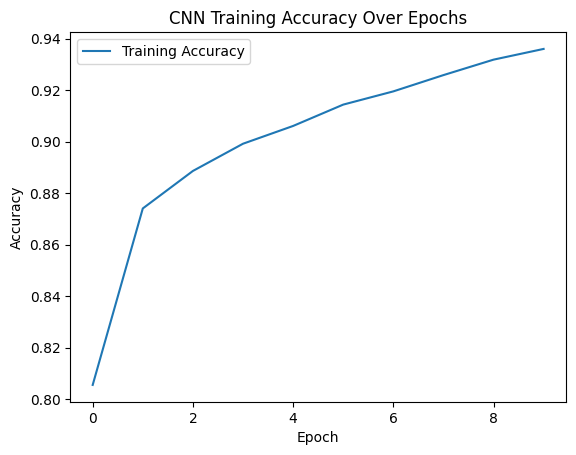

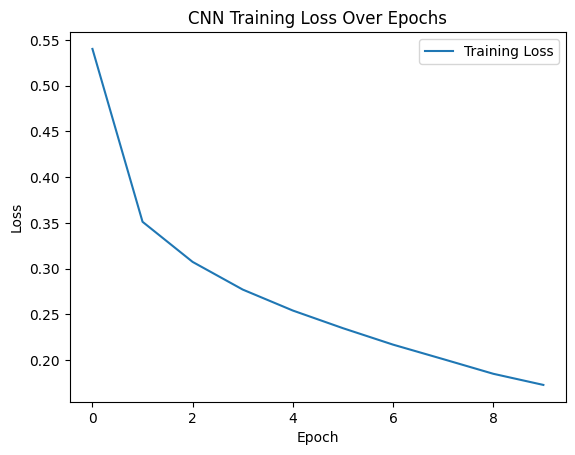

In [ ]:
# Uncomment below lines to Load the model
# from keras.models import load_model
# model = load_model("../models/cnn_model.keras")
# acc = np.load("../models/cnn_history_acc.npy")
# loss = np.load("../models/cnn_history_loss.npy")

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose="0")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

y_pred = model.predict(X_test, verbose="0")
y_pred = y_pred.argmax(axis=1) # Get class with highest probability [0-9]
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"CNN Macro F1 Score: {f1_macro:.2f}")

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CNN Training Accuracy Over Epochs")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN Training Loss Over Epochs")
plt.legend()
plt.show()

## CNN Architecture

The CNN used in this project consists of:

1. Conv2D (32 filters, 3×3) + ReLU  
2. MaxPooling2D (2×2)  
3. Conv2D (64 filters, 3×3) + ReLU  
4. MaxPooling2D (2×2)  
5. Flatten  
6. Dense (128 units, ReLU)  
7. Dense (10 units, Softmax)

This architecture is lightweight yet effective for small grayscale images like Fashion-MNIST.

The Convolutional Neural Network achieved 91.23% test accuracy, outperforming both Logistic Regression and Random Forest. Unlike traditional models that operate on flattened pixels, the CNN learns spatial features directly from the 2D images using convolution and pooling layers. This enables the model to detect edges, textures, and shapes that are important for distinguishing different clothing categories. As a result, the CNN captures visual patterns far more effectively, making it the best-performing model for this image classification task.